In [2]:
import tensorflow as tf
import pydot
import pydotplus
import graphviz
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

tworzenie zbioru walidacyjnego/przeskalowanie koloru na zakres od 0 do 1.

In [6]:
X_valid,X_train = X_train_full[:5000] /255.0,X_train_full[5000:] /255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [7]:
class_names = ["Koszulka","Spodnie","Sweter","Sukienka","Plaszcz","Sandal","Koszula","Tenisowka","Torebka","Trzewik"]

In [8]:
class_names[y_train[0]]

'Plaszcz'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [13]:
history = model.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7113 - accuracy: 0.7647 - val_loss: 0.5134 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4887 - accuracy: 0.8300 - val_loss: 0.4527 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.8445 - val_loss: 0.4386 - val_accuracy: 0.8474
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4166 - accuracy: 0.8538 - val_loss: 0.4012 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3967 - accuracy: 0.8597 - val_loss: 0.3994 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3801 - accuracy: 0.8650 - val_loss: 0.4035 - val_accuracy: 0.8574
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3666 - accuracy: 0.8699 - val_loss: 0.3895 - val_accuracy:

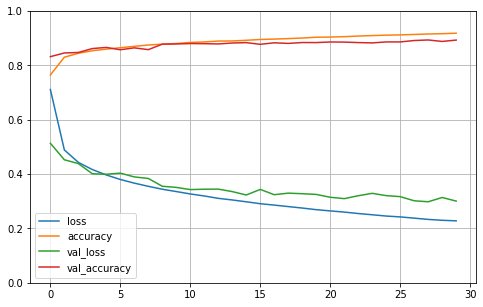

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Wyznacza zakres osi pionowej od 0 do 1
plt.show()

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 75.4165 - accuracy: 0.8297


[75.41650390625, 0.8296999931335449]

In [22]:
X_new = X_test[:50]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [20]:
y_new = y_test[:50]
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)